In [1]:
import pytorch_lightning as pl
from models import *
from data.data_classes import *

In [2]:
save_filepath = "./plots/bounce_plot2.pdf"

In [3]:
batch_size = 4

num_ctx_frames=5
num_tgt_frames=5
split_ratio=[0.4, 0.1, 0.5]

moving_mnist = TwoColourMovingMNISTDataModule(batch_size,               
                                              num_ctx_frames, 
                                              num_tgt_frames,
                                              split_ratio=split_ratio)

moving_mnist.setup()
train_dl = moving_mnist.train_dataloader()
train_ctx_frames, train_tgt_frames = next(iter(train_dl))

val_dl = moving_mnist.val_dataloader()
val_ctx_frames, val_tgt_frames = next(iter(val_dl))                                              

### 3DConvNet models


In [4]:
# # Experiment 1 (skip MSE)
# model = ThreeDConv("skip")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 2 (skip L1)
# model = ThreeDConv("skip")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment2/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 5 (autoreg MSE)
# model = ThreeDConvAutoreg("autoreg")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment5/checkpoints/epoch=99-step=25000.ckpt")

### SimVP models

In [5]:
# hid_s=64
# hid_t=256
# N_s=4
# N_t=8
# kernel_sizes=[3,5,7,11]
# groups=4

# channels = 3
# height = 128
# width = 128
# input_shape = (channels, num_ctx_frames, height, width)

# # Experiment 1  (mse)
# model = SimVP(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment1/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 2  (l1)
# model = SimVP(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment2/checkpoints/epoch=99-step=25000.ckpt")

### PredRNN Models

In [6]:
# input_channels=3
# num_hidden=[64, 64, 64]
# kernel_size=5
# stride=1
# learning_rate=1e-3

# # Experiment 1 (mse)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 2 (l1)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

### Predicted Frames Set 1

In [7]:
hid_s=64
hid_t=256
N_s=4
N_t=8
kernel_sizes=[3,5,7,11]
groups=4

channels = 3
height = 128
width = 128
input_shape = (channels, num_ctx_frames, height, width)

# Experiment 1  (mse)
model = SimVP(input_shape=input_shape, 
              hid_s=hid_s, hid_t=hid_t, 
              N_s=N_s, N_t=N_t,
              kernel_sizes=kernel_sizes, 
              groups=groups)
model = model.load_from_checkpoint("./logs/SimVP/experiment1/checkpoints/epoch=99-step=25000.ckpt")

In [8]:
model.eval()
model1_pred_frames = model(val_ctx_frames)
model1_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

### Predicted Frames Set 2

In [9]:
model = SimVP(input_shape=input_shape, 
              hid_s=hid_s, hid_t=hid_t, 
              N_s=N_s, N_t=N_t,
              kernel_sizes=kernel_sizes, 
              groups=groups)
model = model.load_from_checkpoint("./logs/SimVP/experiment2/checkpoints/epoch=99-step=25000.ckpt")

In [10]:
model.eval()
model2_pred_frames = model(val_ctx_frames)
model2_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

### Predicted Frames Set 3

In [11]:
input_channels=3
num_hidden=[64, 64, 64]
kernel_size=5
stride=1
learning_rate=1e-3

# Experiment 1 (mse)
model = PredRNN(input_channels=input_channels,
                num_hidden=num_hidden,
                num_ctx_frames=num_ctx_frames,
                num_tgt_frames=num_tgt_frames,
                kernel_size=kernel_size,
                stride=stride)
model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

In [12]:
height = 128
width = 128

full_sequence = torch.zeros(batch_size, 3, 10, height, width)
full_sequence[:, :, :5] = val_ctx_frames

model.eval()
for i in range(5, 10):
    predrnn_input = torch.zeros(batch_size, 3, 6, height, width)
    predrnn_input[:, :, :5] = full_sequence[:, :, i-5:i]
    predrnn_input[:, :, 5] =  full_sequence[:, :, i-1]
    full_sequence[:, :, i] = model(predrnn_input)[:, :, -1]  # Keep last frame only

full_sequence.shape

torch.Size([4, 3, 10, 128, 128])

### Predicted Frames Set 4

In [ ]:
model = PredRNN(input_channels=input_channels,
                num_hidden=num_hidden,
                num_ctx_frames=num_ctx_frames,
                num_tgt_frames=num_tgt_frames,
                kernel_size=kernel_size,
                stride=stride)
model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment2/checkpoints/epoch=99-step=25000.ckpt")

In [ ]:
height = 128
width = 128

model4_pred_frames = torch.zeros(batch_size, 3, 10, height, width)
model4_pred_frames[:, :, :5] = val_ctx_frames

model.eval()
for i in range(5, 10):
    predrnn_input = torch.zeros(batch_size, 3, 6, height, width)
    predrnn_input[:, :, :5] = model4_pred_frames[:, :, i-5:i]
    predrnn_input[:, :, 5] =  model4_pred_frames[:, :, i-1]
    model4_pred_frames[:, :, i] = model(predrnn_input)[:, :, -1]  # Keep last frame only

model4_pred_frames.shape

In [ ]:
# model4_pred_frames = model(val_ctx_frames)
# model4_pred_frames.shape

### Plotting

In [16]:
def make_thesis_plot(frame_sets, names, plot_width, plot_height):

    def show_frames(frames, ax, row_label=None):
        start_id = 1 if row_label == "Context" else 5
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.15)

        if row_label is not None:
            ax[0].set_ylabel(row_label, wrap=True)

    fig, ax = plt.subplots(len(frame_sets), 5,
                               figsize = (plot_width, plot_height))

    for i, frames in enumerate(frame_sets):
        print(f"set {i}")
        frames = frames.squeeze().permute(1, 2, 3, 0).cpu().detach().numpy()
        show_frames(frames, ax[i], names[i])
    fig.set_facecolor("white")
    
    return fig

In [19]:
model2_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

In [18]:
full_sequence.shape

torch.Size([4, 3, 10, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


set 0
set 1
set 2


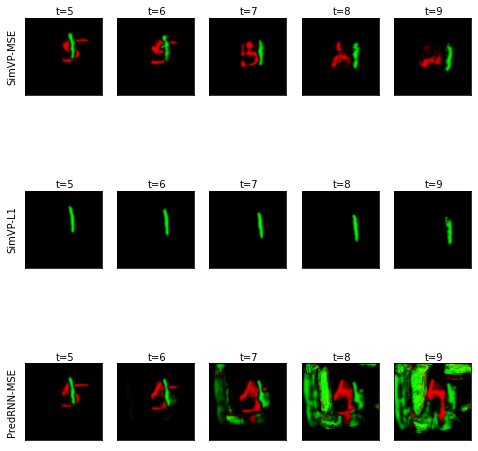

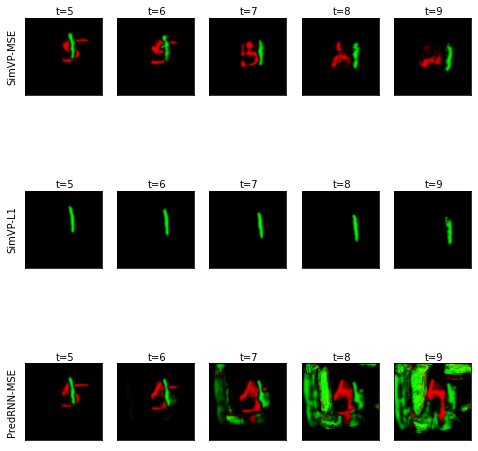

In [28]:
index = 0
plot_width = 8
plot_height = 9
frame_sets = [model1_pred_frames[index],
              model2_pred_frames[index],
              full_sequence[index, :, 5:]]

names = ["SimVP-MSE", "SimVP-L1", "PredRNN-MSE"]
# names = ["SimVP-MSE", "SimVP-L1", "PredRNN-MSE", "PredRNN-L1"]               
make_thesis_plot(frame_sets, names, plot_width, plot_height)

In [24]:
plt.savefig(save_filepath)

<Figure size 432x288 with 0 Axes>